In [8]:
import os

print("Current Working Directory:", os.getcwd())
import ae_inference


Current Working Directory: C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\tf_inference
Current Working Directory: C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\ae_inference


Current Working Directory: C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\torch_face
Current Working Directory: C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\torch_face
Loaded model from C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\torch_face\79999_iter.pth
part_mask shape (512, 512)
binary_skin_mask_stacked shape (512, 512, 3)
image shape (512, 512, 3)
part_mask shape (512, 512)
binary_skin_mask_stacked shape (512, 512, 3)
image shape (512, 512, 3)
skin shape (512, 512, 3)


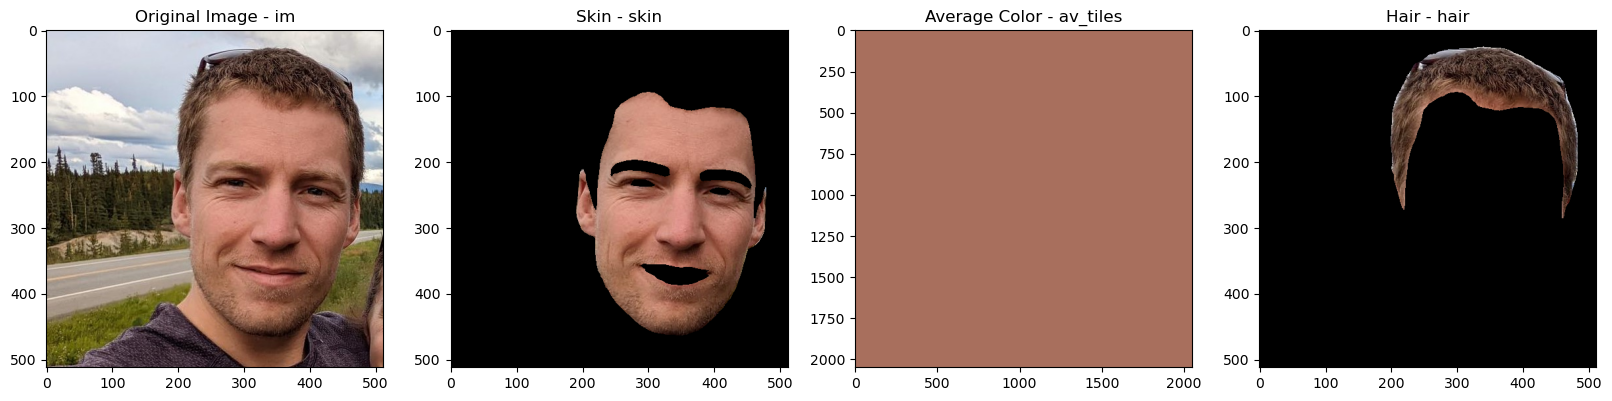

In [9]:
import sys

import torch
import os
import os.path as osp
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
import pickle
import importlib
import torch_face
from torch_face import face_part_segmentation as fps
importlib.reload(torch_face)
im_path = r"C:\Desktop\joel.jpg"
im = Image.open(im_path)
im = im.convert('RGB')
im = np.array(im)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
combined = ['l_ear', 'r_ear','skin', 'mouth', 'nose']
segmenter = fps.FacePartSegmentation(width=2048, height=2048)
part_mask = segmenter.process_image(im, combined)
skin, mask = segmenter.get_skin(im)
av_skin_tile = segmenter.get_skin_tile(im)
hair = segmenter.get_hair(im)
ax[0].imshow(im)
ax[0].set_title('Original Image - im')
ax[1].imshow(part_mask)
ax[1].set_title('Part Mask - part_mask')
ax[1].imshow(skin)
ax[1].set_title('Skin - skin')
ax[2].imshow(av_skin_tile.astype(np.uint8))
ax[2].set_title('Average Color - av_tiles')
ax[3].imshow(part_mask)
ax[3].set_title('Part Mask - part_mask')
ax[3].imshow(hair)
ax[3].set_title('Hair - hair')
plt.show()

skin_mask = segmenter.process_image

In [17]:


!mamba install -c conda-forge tensorflow
!mamba install -c conda-forge tensorflow-gpu
import sys
import tf_inference 
from tf_inference import tf_ae as TensorFlowAutoencoder
import importlib
importlib.reload(tf_inference)
sys.path.append('fitzpatrick')
def apply_changes_to_skin_channel(chromophore_map, channel_index, skin_mask=None):
    if skin_mask is None:
        skin_mask = np.ones_like(chromophore_map).astype(bool)
    # Ensure the mask is boolean and the same shape as the chromophore map's spatial dimensions
    skin_mask = skin_mask.astype(bool)
    
    # Extract the specified channel from the chromophore map
    channel_to_modify = chromophore_map[:, :, channel_index]

    # Apply changes only to the skin regions of the specified channel
    modified_channel = channel_to_modify.copy()
    modified_channel[skin_mask] = (channel_to_modify[skin_mask] * 0.5) + 0.0

    # Place the modified channel back into the chromophore map
    modified_map = chromophore_map.copy()
    modified_map[:, :, channel_index] = modified_channel

    return modified_map
def reverse_gamma_correction(img):
    """Reverse gamma correction on an image."""
    #if image > 1
    if np.max(img) > 1:
        img = img / 255.0
    return np.where(img > 0.04045, ((img + 0.055) / 1.055) ** 2.4, img / 12.92)
    # return np.array(img)

def gamma_correction(img):
    if np.max(img) > 1:
        img = img / 255.0
    """Gamma correction on an image."""
    return np.where(img > 0.0031308, 1.055 * (img ** (1 / 2.4)) - 0.055, 12.92 * img)


autoencoder = TensorFlowAutoencoder(
    encoder_path=r'C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\tf_inference\saved_models\no_duplicates_75_2_mask\encoder.h5', 
    decoder_path=r'C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\tf_inference\saved_models\no_duplicates_75_2_mask\decoder.h5')
print(encoder)
print(decoder)
image_dir = r"C:\Users\joeli\Dropbox\Code\Python Projects\Texture_Image_Pipeline\fitzpatrick"
image_paths  =  os.listdir(image_dir)
image_paths = [os.path.join(image_dir, im) for im in image_paths]
segmenter = fps.FacePartSegmentation(width=2048, height=2048)
print(image_paths)
for im_path in image_paths[:2]:
    im = Image.open(im_path)
    im = im.convert('RGB')
    im = np.array(im)
    if im is None:
        print('Image not found')
        continue
    combined = ['l_ear', 'r_ear','skin', 'mouth', 'nose']
    skin, skin_mask = segmenter.get_skin(im)

    im = cv2.resize(im, (2048, 2048))
    im = im.astype(np.float32)
    print(im.shape)
    encoded_features = my_autoencoder.encode_image(im)
    pm = encoded_features.reshape(2048, 2048, 5)
    cm = pm[:,:,0]

    skin_mask = cv2.resize(skin_mask.astype(np.float32), (2048, 2048))

    pm  = apply_changes_to_skin_channel(pm, channel_index=0, skin_mask=skin_mask)

    plt.imshow(cm)
    plt.show()
    decoded_image = my_autoencoder.decode_image(pm, width=im.shape[1], height=im.shape[0])
    # print(decoded_image)
    plt.imshow(decoded_image)
    plt.show()


Looking for: ['tensorflow']

conda-forge/win-64                                          Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*


Could not solve for environment specs
The following packages are incompatible
└─ tensorflow   is installable with the potential options
   ├─ tensorflow [0.12.1|1.0.0|...|1.9.0] would require
   │  └─ python [3.5* |>=3.5,<3.6.0a0 ], which can be installed;
   ├─ tensorflow [1.10.0|1.13.1|...|1.9.0] would require
   │  ├─ python >=3.6,<3.7.0a0 , which can be installed;
   │  └─ tensorflow-base [1.13.1 py36_4|1.13.1 py36_5|...|1.14.0 py36h9f0ad1d_0], which requires
   │     └─ python >=3.6,<3.7.0a0 , which can be installed;
   ├─ tensorflow [1.13.1|1.14.0] would require
   │  ├─ python >=3.7,<3.8.0a0 , which can be installed;
   │  └─ tensorflow-base [1.13.1 py37_7|1.14.0 py37hc8dfbb8_0], which requires
   │     └─ python >=3.7,<3.8.0a0 , which can be installed;
   ├─ tensorflow 

warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse state file: Could not load cache state: [json.exception.type_error.302] type must be string, but is null
warning  libmamba Could not remove state file "C:\\Users\\joeli\\miniforge3\\pkgs\\cache\\3e649c23.state.json": The process cannot access the file because it is being used by another process.
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse state file: Could not load cache state: [json.exception.type_error.302] type must be string, but is null
warning  libmamba Could not remove state file "C:\\Users\\joeli\\miniforge3\\pkgs\\cache\\07d6fe9b.state.json": The process cannot access the file because it is being used by anoth


Looking for: ['tensorflow-gpu']

conda-forge/win-64                                          Using cache
conda-forge/noarch                                          Using cache
pkgs/main/win-64                                            Using cache
pkgs/main/noarch                                            Using cache
pkgs/r/win-64                                               Using cache
pkgs/r/noarch                                               Using cache
pkgs/msys2/win-64                                           Using cache
pkgs/msys2/noarch                                           Using cache

Pinned packages:
  - python 3.10.*


Could not solve for environment specs
The following packages are incompatible
└─ tensorflow-gpu   is installable with the potential options
   ├─ tensorflow-gpu 1.10.0 would require
   │  └─ tensorflow 1.10.0  with the potential options
   │     ├─ tensorflow [1.10.0|1.13.1|1.14.0|1.9.0] would require
   │     │  ├─ python >=3.6,<3.7.0a0 , which can 

warning  libmamba Could not parse state file: Could not load cache state: [json.exception.type_error.302] type must be string, but is null
warning  libmamba Could not remove state file "C:\\Users\\joeli\\miniforge3\\pkgs\\cache\\3e649c23.state.json": The process cannot access the file because it is being used by another process.
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse state file: Could not load cache state: [json.exception.type_error.302] type must be string, but is null
warning  libmamba Could not remove state file "C:\\Users\\joeli\\miniforge3\\pkgs\\cache\\07d6fe9b.state.json": The process cannot access the file because it is being used by another process.
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse state file: Could not load cache state: [json.exception.type_error.302] type must be string, but is null
warning  libmamba Could not remove state file "C:\\Users\\joeli\\miniforge3\\pkgs\\cache\\eff5c302.

ModuleNotFoundError: No module named 'tensorflow.keras'